<a href="https://colab.research.google.com/github/workhardzy/K6312/blob/main/Testing_sentiment_analysis_binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import time

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from IPython.display import display
import pickle
from tqdm.notebook import tqdm


loading data

In [ ]:
#https://archive.ics.uci.edu/ml/datasets/News+Popularity+in+Multiple+Social+Media+Platforms
#https://www.kaggle.com/therohk/million-headlines

path = '/content/gdrive/My Drive/covid_mining/UCI/News_Final.csv' 
df = pd.read_csv(path,encoding='UTF-8')
df

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
0,99248.0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,0.000000,-0.053300,-1,-1,-1
1,10423.0,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,0.208333,-0.156386,-1,-1,-1
2,18828.0,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-0.425210,0.139754,-1,-1,-1
3,27788.0,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,0.000000,0.026064,-1,-1,-1
4,27789.0,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,0.000000,0.141084,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...
93234,61851.0,Stocks rise as investors key in on US economy ...,The June employment report is viewed as a cruc...,MarketWatch,economy,2016-07-07 15:31:05,0.104284,0.044943,-1,3,5
93235,61865.0,Russian PM proposes to use conservative and to...,"In addition, establish stimulating economic po...",TASS,economy,2016-07-07 15:31:10,0.072194,0.000000,-1,0,1
93236,104793.0,Palestinian Government Uses Foreign Aid To Pay...,The Palestinian government spends nearly $140 ...,Daily Caller,palestine,2016-07-07 15:38:26,0.291667,-0.139754,5,1,0
93237,104794.0,Palestine Youth Orchestra prepares for first U...,Palestine Youth Orchestra prepares for first U...,Ahram Online,palestine,2016-07-07 15:59:22,0.121534,0.092313,0,0,0


In [ ]:
df['SentimentTitle'].describe()

count    93239.000000
mean        -0.005411
std          0.136431
min         -0.950694
25%         -0.079057
50%          0.000000
75%          0.064255
max          0.962354
Name: SentimentTitle, dtype: float64

In [ ]:
#transforming the data between 0-1
def transform_to_label(x):
    if x > 0:
        return 1
    else:
        return 0

df['SentimentTitle_label'] = df['SentimentTitle'].apply(lambda x: transform_to_label(x))

In [ ]:
df['SentimentTitle_label'].value_counts()

0    56650
1    36589
Name: SentimentTitle_label, dtype: int64

In [ ]:
df = df[['Title','SentimentTitle_label']]
df.columns = ['Text','Label']
X = df['Text'].fillna('').tolist()
X = [str(i) for i in X]
y = df['Label'].fillna('').tolist()

For the million headlines

Train test split

In [ ]:
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=RANDOM_STATE)


#text preprocessing

In [ ]:
from bs4 import BeautifulSoup
import nltk
from nltk.util import ngrams
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer
from nltk import word_tokenize
import re
import pickle


nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#to remove html tags, lemmatisation . etc etc
additional_stop_words = []                                                      ########调 (optional)

def text_cleanup(text):  
    '''
    Text pre-processing
        return a sentence of cleaned words
    '''
    text = str(text)
    #remove html tags
    text_clean = BeautifulSoup(text, "lxml").text

    ## Convert to lowercase
    text_clean = text_clean.lower()
    ##Remove non-alphabet
    text_clean = re.sub(r'[^a-zA-Z]|(\w+:\/\/\S+)',' ', text_clean)

    ##spliting into tokens
    text_clean = text_clean.split()

    ##Remove short words (length < 3)
    text_clean = [w for w in text_clean if len(w)>2]

    ##Lemmatize text ## alternative is to use stemming
    #lemmatizer = WordNetLemmatizer()
    #text_clean = [lemmatizer.lemmatize(w) for w in text_clean]
    
    #ps = PorterStemmer()
    #text_clean = [ps.stem(w) for w in text_clean]
    
    ## Filter out stop words in English 
    stops = set(stopwords.words('english')).union(additional_stop_words)
    text_clean = [w for w in text_clean if w not in stops]
    
    #joining the list into a sentence
    mySeparator = " "
    text_clean = mySeparator.join(text_clean)


    return text_clean

txt = r"This movie is not based on the bible. It completely leaves Christ out of the movie. They do not show the rapture or the second coming of Christ. Let alone talk about it. It does not quote from scriptures. The end times are called the great tribulation. The movie does not even show bad times. The seven bowls, seven viles and seven trumpets of judgements are boiled down to a 15 second news cast of the sea changing it's structure. The anti-Christ was killed 3 1/2 years into the tribulation and that is how the movie ended. The only part they got correct was there was two prophets. The did not use there names of course because that would be too close to the truth of scriptures. The worst part of it was I really wanted it to be a good movie. I wanted to take unsaved people to it. I feel that the movie is evil. It is a counterfeit just like everything the devil does. I just hope it does not take away from the upcoming movie based on the left behind books.<br /><br />The second problem with the movie is it was just bad. Bad acting, bad special effects, bad plot and poor character development. I have seen better episodes of Miami vice."
print('ORIGINAL','\n', txt)
text_cleanup(txt)

ORIGINAL 
 This movie is not based on the bible. It completely leaves Christ out of the movie. They do not show the rapture or the second coming of Christ. Let alone talk about it. It does not quote from scriptures. The end times are called the great tribulation. The movie does not even show bad times. The seven bowls, seven viles and seven trumpets of judgements are boiled down to a 15 second news cast of the sea changing it's structure. The anti-Christ was killed 3 1/2 years into the tribulation and that is how the movie ended. The only part they got correct was there was two prophets. The did not use there names of course because that would be too close to the truth of scriptures. The worst part of it was I really wanted it to be a good movie. I wanted to take unsaved people to it. I feel that the movie is evil. It is a counterfeit just like everything the devil does. I just hope it does not take away from the upcoming movie based on the left behind books.<br /><br />The second prob

'movie based bible completely leaves christ movie show rapture second coming christ let alone talk quote scriptures end times called great tribulation movie even show bad times seven bowls seven viles seven trumpets judgements boiled second news cast sea changing structure anti christ killed years tribulation movie ended part got correct two prophets use names course would close truth scriptures worst part really wanted good movie wanted take unsaved people feel movie evil counterfeit like everything devil hope take away upcoming movie based left behind books second problem movie bad bad acting bad special effects bad plot poor character development seen better episodes miami vice'

In [ ]:
from tqdm.notebook import tqdm
#for text preprocessing #you can run without doing so

#doing list comprehension
X_train = [text_cleanup(txt) for txt in tqdm(X_train)]
X_test = [text_cleanup(txt) for txt in tqdm(X_test)]

In [ ]:
#do use tfidf if you think it helps
#if need be, can try to use word embeddings

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer() 
X_train = count_vect.fit_transform(X_train)
X_test = count_vect.transform(X_test)


In [ ]:
X_train[0]

<1x21637 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [ ]:
#confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('Truth')
  plt.xlabel('Predicted');


# Testing Machine Learning approaches

Logistic Regression

In [ ]:
#LR
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=400,random_state=42)
model.fit(X_train, y_train)
print('accuracy:',model.score(X_test,y_test))

#classification report
y_pred = model.predict(X_test) 

print(classification_report(y_test, y_pred))


accuracy: 0.8096739596739597
              precision    recall  f1-score   support

           0       0.82      0.88      0.85     28363
           1       0.79      0.70      0.74     18257

    accuracy                           0.81     46620
   macro avg       0.81      0.79      0.80     46620
weighted avg       0.81      0.81      0.81     46620



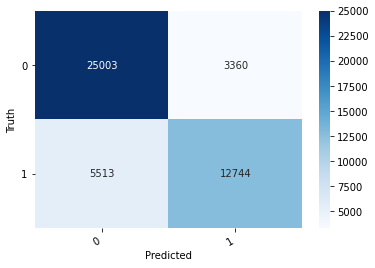

In [ ]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
show_confusion_matrix(df_cm)

In [ ]:
filename = '/content/gdrive/My Drive/covid_mining/LR_model_news.h5'
pickle.dump(model, open(filename, 'wb'))

SVM

Ensemble Learning AdaBoostClassifier


In [ ]:
#source: https://machinelearningmastery.com/adaboost-ensemble-in-python/
from sklearn.ensemble import AdaBoostClassifier

model= AdaBoostClassifier(random_state=1)            
model.fit(X_train, y_train)
print('accuracy:',model.score(X_test,y_test))

#classification report
y_pred = model.predict(X_test) 

cm = confusion_matrix(y_test, y_pred) 
print(cm) 

print(classification_report(y_test, y_pred))

# without text preprocessing 0.69824
# with text preprocessing 0.69844

accuracy: 0.7074860574860575
[[25699  2664]
 [10973  7284]]
              precision    recall  f1-score   support

           0       0.70      0.91      0.79     28363
           1       0.73      0.40      0.52     18257

    accuracy                           0.71     46620
   macro avg       0.72      0.65      0.65     46620
weighted avg       0.71      0.71      0.68     46620



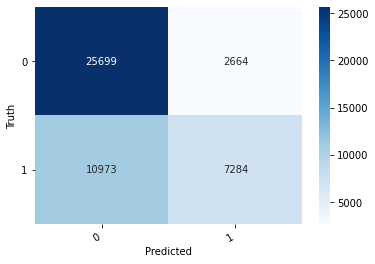

In [ ]:
#confusion matrix

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
show_confusion_matrix(df_cm)

In [ ]:
filename = '/content/gdrive/My Drive/covid_mining/Ada_model_news.h5'
pickle.dump(model, open(filename, 'wb'))

#Manually annotating a sample

In [ ]:
news_df = pd.read_csv('/content/gdrive/My Drive/covid_mining/covid19_articles_20200914.csv').drop(['Unnamed: 0'],axis=1)
news_df.head()

,title,url,crawled_time,date,domain,author,content,topic_area
0,Three Industrial Giants You Should Own In 2020,https://www.marketbeat.com/originals/three-ind...,2020-05-19,2020-01-02,marketbeat,Thomas Hughes,"Posted on Thursday, January 2nd, 2020 by Thoma...",business
1,"Tesla (TSLA) Breaks Shipment Record, Beats Est...",https://www.marketbeat.com/originals/teal-brea...,2020-05-19,2020-01-03,marketbeat,Steve Anderson,"It could be forgiven, that some might think th...",business
2,Labor Stocks Are Going To Break Out In 2020,https://www.marketbeat.com/originals/labor-sto...,2020-05-19,2020-01-03,marketbeat,Thomas Hughes,"Posted on Friday, January 3rd, 2020 by Thomas ...",business
3,Cal-Maine Just Shed 12% - But Is Now The Time ...,https://www.marketbeat.com/originals/cal-maine...,2020-05-19,2020-01-06,marketbeat,Thomas Hughes,"Posted on Monday, January 6th, 2020 by Thomas ...",business
4,"China pneumonia outbreak: It's not SARS, so wh...",https://www.edition.cnn.com/2020/01/06/health/...,2020-06-22,2020-01-06,edition.cnn,"Nectar Gan, CNN",A total of 59 cases of unknown viral pneumonia...,business


In [ ]:
news_df_sample = news_df.sample(100)

In [ ]:
#loading model
filename = '/content/gdrive/My Drive/covid_mining/LR_model.h5'
LR_model = pickle.load(open(filename, 'rb'))

filename = '/content/gdrive/My Drive/covid_mining/Ada_model.h5'
ada_model = pickle.load(open(filename, 'rb'))


In [ ]:
def label_text(text,model,vect):
    text = vect.transform([text])
    return model.predict(text).flatten()[0]

def label_prob(text,model,vect):
    text = vect.transform([text])
    return model.predict_proba(text).flatten()

In [ ]:
for i in range(20):
    print(label_text(news_df['title'][i],LR_model,count_vect))

ValueError: ignored

In [ ]:
#using LR
from tqdm import tqdm
tqdm.pandas()

news_df_sample['predicted']  = news_df_sample['title'].progress_apply(lambda x: label_text(x,LR_model,count_vect))
news_df_sample['predicted_proba']  = news_df_sample['title'].progress_apply(lambda x: label_prob(x,LR_model,count_vect))

  0%|          | 0/100 [00:00<?, ?it/s]

ValueError: ignored

In [ ]:
news_df_sample

In [ ]:
news_df_sample = news_df_sample[['title','url','date','predicted','predicted_proba']]
news_df_sample

In [ ]:
news_df_sample.to_csv('/content/gdrive/My Drive/covid_mining/sentiment_manual_validation_set.csv')

Creating a proper gold standard dataset

#Evaluating model's performance on the out-of-distribution set


In [ ]:
path = '/content/gdrive/My Drive/covid_mining/annotated_sentiment_manual_validation_set.csv' #this is from our manually annotated sentiment set
val_df = pd.read_csv(path,encoding='UTF-8')


In [ ]:
#loading model
filename = '/content/gdrive/My Drive/covid_mining/LR_model_news.h5'
LR_model = pickle.load(open(filename, 'rb'))

filename = '/content/gdrive/My Drive/covid_mining/Ada_model_news.h5'
ada_model = pickle.load(open(filename, 'rb'))

In [ ]:
def label_text(text,model,vect):
    text = vect.transform([text])
    return model.predict(text).flatten()[0]

def label_prob(text,model,vect):
    text = vect.transform([text])
    return model.predict_proba(text).flatten()

In [ ]:
val_df.columns

Index(['Unnamed: 0', 'title', 'url', 'date', 'predicted', 'predicted_proba',
       'xy_predict', 'zy_predict', 'vote_label', 'Unnamed: 9', 'is_correct'],
      dtype='object')

In [ ]:
val_df = val_df[['title','vote_label']].dropna()
val_df.columns = ['X','y']
y_test = val_df.y.tolist()

In [ ]:
y_pred = []
for x in val_df.X:
    print(x)
    y_hat = label_text(x,LR_model,count_vect)
    y_pred.append(y_hat)

How Gen Z is using art and creativity to improve their mental health
Danny Meyer: 'Restaurants are not going to be back full force by June'
Bolivia’s Covid Death Rate Soared As Politicians Clashed
The ‘Green Shoots’ at PVH
Nexera Energy : Q2 2020 Remarks | MarketScreener
Federal Court finds border closures safest way to protect public health in Clive Palmer case
Aprea Therapeutics Completes Full Enrollment of Phase 3 Clinical Trial in TP53 Mutant Myelodysplastic Syndromes (MDS)
Trump contradicts Pompeo by downplaying foreign coronavirus disinformation campaigns - CNNPolitics
Pakistan State Oil : Government initiates inquiry against oil companies | MarketScreener
Edited Transcript of FSIC earnings conference call or presentation 28-Feb-20 3:00pm GMT
89bio Reports Second Quarter 2020 Financial Results and Provides Corporate Update | MarketScreener
PrairieSky Royalty : ANNOUNCES CONFERENCE CALL FOR Q1 2020 RESULTS | MarketScreener
Adaptive, Microsoft to conduct study evaluating T-cells in

In [ ]:
#classification report for LR
y_pred = [label_text(x,LR_model,count_vect) for x in val_df.X]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.50      0.54      0.52        56
         1.0       0.35      0.32      0.33        44

    accuracy                           0.44       100
   macro avg       0.42      0.43      0.43       100
weighted avg       0.43      0.44      0.44       100



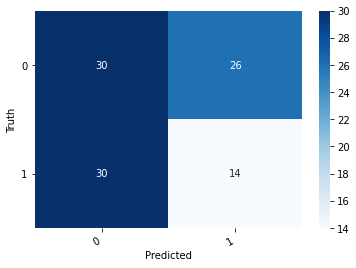

In [ ]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
show_confusion_matrix(df_cm)

In [ ]:
#classification report for ada
y_pred = [label_text(x,ada_model,count_vect) for x in val_df.X]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.51      0.68      0.58        56
         1.0       0.28      0.16      0.20        44

    accuracy                           0.45       100
   macro avg       0.39      0.42      0.39       100
weighted avg       0.41      0.45      0.41       100



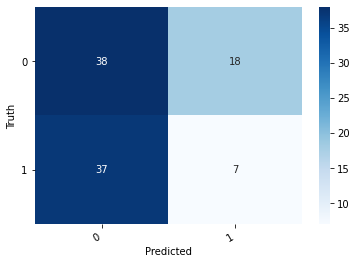

In [ ]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
show_confusion_matrix(df_cm)

Using vader

In [ ]:
path = '/content/gdrive/My Drive/covid_mining/UCI/News_Final.csv' 
df = pd.read_csv(path,encoding='UTF-8')
df

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
0,99248.0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,0.000000,-0.053300,-1,-1,-1
1,10423.0,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,0.208333,-0.156386,-1,-1,-1
2,18828.0,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-0.425210,0.139754,-1,-1,-1
3,27788.0,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,0.000000,0.026064,-1,-1,-1
4,27789.0,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,0.000000,0.141084,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...
93234,61851.0,Stocks rise as investors key in on US economy ...,The June employment report is viewed as a cruc...,MarketWatch,economy,2016-07-07 15:31:05,0.104284,0.044943,-1,3,5
93235,61865.0,Russian PM proposes to use conservative and to...,"In addition, establish stimulating economic po...",TASS,economy,2016-07-07 15:31:10,0.072194,0.000000,-1,0,1
93236,104793.0,Palestinian Government Uses Foreign Aid To Pay...,The Palestinian government spends nearly $140 ...,Daily Caller,palestine,2016-07-07 15:38:26,0.291667,-0.139754,5,1,0
93237,104794.0,Palestine Youth Orchestra prepares for first U...,Palestine Youth Orchestra prepares for first U...,Ahram Online,palestine,2016-07-07 15:59:22,0.121534,0.092313,0,0,0


In [ ]:
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=RANDOM_STATE)

In [ ]:
#doing list comprehension
X_train = [text_cleanup(txt) for txt in tqdm(X_train)]
X_test = [text_cleanup(txt) for txt in tqdm(X_test)]


100%|██████████| 46619/46619 [00:21<00:00, 2156.05it/s]

100%|██████████| 46620/46620 [00:22<00:00, 2109.21it/s]


In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in X_test:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

print(results[:3])

df = pd.DataFrame.from_records(results)
df.head()

[{'neg': 0.453, 'neu': 0.547, 'pos': 0.0, 'compound': -0.7003, 'headline': 'obama nerd president needs get right star wars fans'}, {'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'compound': 0.2732, 'headline': 'johannesburg committed developing job intensive economy says'}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'headline': 'whose president'}]


,neg,neu,pos,compound,headline
0,0.453,0.547,0.000,-0.7003,obama nerd president needs get right star wars...
1,0.000,0.741,0.259,0.2732,johannesburg committed developing job intensiv...
2,0.000,1.000,0.000,0.0000,whose president
3,0.000,0.682,0.318,0.4215,argentina pays holdout bondholders elevating h...
4,0.272,0.543,0.185,-0.2023,obama trump displays ignorance seeks tweets so...


In [ ]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = 0
df.head()

,neg,neu,pos,compound,headline,label
0,0.453,0.547,0.000,-0.7003,obama nerd president needs get right star wars...,0
1,0.000,0.741,0.259,0.2732,johannesburg committed developing job intensiv...,1
2,0.000,1.000,0.000,0.0000,whose president,0
3,0.000,0.682,0.318,0.4215,argentina pays holdout bondholders elevating h...,1
4,0.272,0.543,0.185,-0.2023,obama trump displays ignorance seeks tweets so...,0


In [ ]:
df

In [ ]:
print(classification_report(y_test, df.label))

              precision    recall  f1-score   support

           0       0.64      0.78      0.70     28363
           1       0.49      0.32      0.39     18257

    accuracy                           0.60     46620
   macro avg       0.56      0.55      0.55     46620
weighted avg       0.58      0.60      0.58     46620

